In [34]:
import pandas
import numpy as np

def prepare_data(test):
    na_age = test['Age'].isna()
    #na_age.replace(False, float(0))
    test['is_Age']= na_age.replace(False, 0)
    test.pop('Ticket')
    test['Age'] = test['Age'].fillna(0)
    '''
    test['Embarked_Q'] = test['Embarked'].replace('Q', 1).replace('S', 0).replace('C', 0).fillna(0)
    test['Embarked_C'] = test['Embarked'].replace('C', 1).replace('S', 0).replace('Q', 0).fillna(0)
    test['Embarked_S'] = test['Embarked'].replace('S', 1).replace('Q', 0).replace('C', 0).fillna(0)
    '''
    test.pop('Embarked')
    test.pop('Cabin')
    test.pop('Name')
    test.pop('PassengerId')
    test = test.replace('male', 1.).replace('female', -1.)
    return test

In [56]:
data = pandas.read_csv('train.csv')
data.loc[pandas.isna(data['Cabin']) ][1:60]
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [2]:
data = pandas.read_csv('train.csv')
df = prepare_data(data)
y = df.pop('Survived').replace(0, -1).to_numpy()
#print(y)
#df.loc[pandas.isna(f['Embarked_Q'])]
#f.isnull().values.any()
#df.isnull().sum().sum()
df = df.to_numpy()

riga = df[0]
riga[2] = 120
print(df[0])

np.zeros(len(df[0]))

[  3.     1.   120.     1.     0.     7.25   0.  ]


array([0., 0., 0., 0., 0., 0., 0.])

In [3]:
test = pandas.read_csv('test.csv')
def prepare_data(test):
    na_age = test['Age'].isna()
    #na_age.replace(False, float(0))
    test['is_Age']= na_age.replace(False, 0)
    test.pop('Ticket')
    test['Age'] = test['Age'].fillna(0)
    '''
    test['Embarked_Q'] = test['Embarked'].replace('Q', 1).replace('S', 0).replace('C', 0).fillna(0)
    test['Embarked_C'] = test['Embarked'].replace('C', 1).replace('S', 0).replace('Q', 0).fillna(0)
    test['Embarked_S'] = test['Embarked'].replace('S', 1).replace('Q', 0).replace('C', 0).fillna(0)
    '''
    test.pop('Embarked')
    test.pop('Cabin')
    test.pop('Name')
    test.pop('PassengerId')
    test = test.replace('male', 1.).replace('female', -1.)
    return test
#prepare_data(test)

def small_data(test):
    na_age = test['Age'].isna()
    #na_age.replace(False, float(0))
    test['is_Age']= na_age.replace(False, 0)
    test.pop('Ticket')
    test['Age'] = test['Age'].fillna(0)
    '''
    test['Embarked_Q'] = test['Embarked'].replace('Q', 1).replace('S', 0).replace('C', 0).fillna(0)
    test['Embarked_C'] = test['Embarked'].replace('C', 1).replace('S', 0).replace('Q', 0).fillna(0)
    test['Embarked_S'] = test['Embarked'].replace('S', 1).replace('Q', 0).replace('C', 0).fillna(0)
    '''
    test.pop('Embarked')
    test.pop('Cabin')
    test.pop('Name')
    test.pop('PassengerId')
    test.pop('SibSp')
    test.pop('Parch')
    #test.pop('Pclass')
    test.pop('Age')
    test.pop('is_Age')
    
    test = test.replace('male', 1.).replace('female', -1.)
    return test

small_data(test)

,Pclass,Sex,Fare
0,3,1.0,7.8292
1,3,-1.0,7.0000
2,2,1.0,9.6875
3,3,1.0,8.6625
4,3,-1.0,12.2875
...,...,...,...
413,3,1.0,8.0500
414,1,-1.0,108.9000
415,3,1.0,7.2500
416,3,1.0,8.0500


In [4]:
import numpy as np
import random 

class Node:
    def __init__(self,  connect_down ,  connect_val = [], data = 1,  diff = 0):
        self.data = data
        self.connect_down = connect_down
        d = len(connect_down) + 1 - len(connect_val)
        if d > 0 : connect_val =  connect_val + [random.uniform(-0.1,0.1) for _ in range(d)]
        self.connect_val = np.array(connect_val)
        self.diff = diff
        self.val_diff = np.zeros(len(connect_val))
    
    def prop_data (self):
        val = 0.
        for i in range(0,len(self.connect_down)):
            if type(self.connect_down[i]) == Node :
                self.connect_down[i].prop_data()
                val = val + self.connect_val[i]*self.connect_down[i].data
            else :
                val = val + self.connect_val[i] * self.connect_down[i]
        val = val + self.connect_val[-1]
        
        self.data = np.tanh(val)
        return self.data
        
    def prop_diff_val (self):
        self.diff = self.diff * (1.- self.data * self.data)
        out=[]
        for i in range(0,len(self.connect_down)):
            if type(self.connect_down[i]) == Node :
                self.connect_down[i].diff += self.connect_val[i] * self.diff
                out = out + [self.connect_down[i].data * self.diff]
            else:
                out = out + [self.connect_down[i]* self.diff]
        out = out + [self.diff]
        return np.array(out)
    
    def step(self):
        self.val_diff = self.val_diff + self.prop_diff_val()
    
    def implement_val_diff(self, s, ndata):
        self.connect_val += self.val_diff * s/ ndata
        self.val_diff = np.zeros(len(self.connect_val))
        for i in range(0,len(self.connect_down)):
            if type(self.connect_down[i]) == Node :
                self.connect_down[i].implement_val_diff(s, ndata)
    
    def delete_val_diff(self):
        self.val_diff = np.zeros(len(connect_val))
        for i in self.connect_down:
            if type(i) == Node:
                i.implement_steps()
    
    def prop_diff(self):
        self.diff = self.diff * (1.- self.data * self.data)
        return self.diff
    
    def prop_diff_single_val(self,i):
        if type(self.connect_down[i]) == Node:
            self.connect_down[i].diff += self.connect_val[i] * self.diff
        return self.connect_val[i] * self.diff
    
    def set_all_diff_zero(self):
        self.diff = 0
        for i in range(0,len(self.connect_down)):
            if type(self.connect_down[i]) == Node :
                self.connect_down[i].set_all_diff_zero()
    
    def head(self, y):
        self.set_all_diff_zero()
        self.diff = (y - self.prop_data())
        #return self.prop_data()


In [47]:
np.tanh(1)

0.7615941559557649

In [17]:
data = pandas.read_csv('train.csv')
df = prepare_data(data)

y = df.pop('Survived').replace(0, -1)

df = df.to_numpy()
y = y.to_numpy()

n = Network([8], df, y)

n.network[0][1].data

var = np.array(n.cycle(0, 500))
print("L'errore iniziale è : "+ str(np.mean(var * var)))
n.head.implement_val_diff(0.1, 500)
err = []
ver = []
for i in range(1,2500):
    n.head.implement_val_diff(0.01, 500)
    var = np.array(n.cycle(0, 500))
    print("L'errore dopo ciclo "+str(i)+" è : "+ str(np.mean(var * var)))
    err = err + [np.mean(var * var)]
    
    v = np.array(n.verify(501, 890))
    ver = ver + [np.mean(v * v)]
    print("L'errore su dati esterni è : "+ str(np.mean(v * v)))
    
err = np.array(err)
ver = np.array(ver)

L'errore iniziale è : 1.0142130929066713
L'errore dopo ciclo 1 è : 0.9353983472190283
L'errore su dati esterni è : 0.9188724579048945
L'errore dopo ciclo 2 è : 0.933605846595391
L'errore su dati esterni è : 0.9171014700205459
L'errore dopo ciclo 3 è : 0.9319414699702013
L'errore su dati esterni è : 0.9154526427247397
L'errore dopo ciclo 4 è : 0.930398551566987
L'errore su dati esterni è : 0.9139222562471785
L'errore dopo ciclo 5 è : 0.9289685993135359
L'errore su dati esterni è : 0.912505137778507
L'errore dopo ciclo 6 è : 0.9276418247716284
L'errore su dati esterni è : 0.9111940483683931
L'errore dopo ciclo 7 è : 0.9264081647019945
L'errore su dati esterni è : 0.9099799557803994
L'errore dopo ciclo 8 è : 0.9252581772204946
L'errore su dati esterni è : 0.9088529062351448
L'errore dopo ciclo 9 è : 0.9241834721431422
L'errore su dati esterni è : 0.9078029384852205
L'errore dopo ciclo 10 è : 0.9231767434675978
L'errore su dati esterni è : 0.9068206939735366
L'errore dopo ciclo 11 è : 0.92

L'errore dopo ciclo 89 è : 0.891197277615424
L'errore su dati esterni è : 0.8617797704778891
L'errore dopo ciclo 90 è : 0.8908542990997996
L'errore su dati esterni è : 0.8612459962010623
L'errore dopo ciclo 91 è : 0.8905114654956511
L'errore su dati esterni è : 0.8607138472756977
L'errore dopo ciclo 92 è : 0.8901689529177226
L'errore su dati esterni è : 0.8601835431561307
L'errore dopo ciclo 93 è : 0.8898269338404452
L'errore su dati esterni è : 0.8596552981879277
L'errore dopo ciclo 94 è : 0.8894855743977002
L'errore su dati esterni è : 0.8591293175538961
L'errore dopo ciclo 95 è : 0.8891450317634465
L'errore su dati esterni è : 0.8586057933025479
L'errore dopo ciclo 96 è : 0.8888054516938452
L'errore su dati esterni è : 0.8580849006029926
L'errore dopo ciclo 97 è : 0.8884669663090841
L'errore su dati esterni è : 0.8575667943648974
L'errore dopo ciclo 98 è : 0.8881296921863833
L'errore su dati esterni è : 0.8570516063488101
L'errore dopo ciclo 99 è : 0.8877937288248308
L'errore su dat

L'errore dopo ciclo 177 è : 0.8627240497841301
L'errore su dati esterni è : 0.8204095830634102
L'errore dopo ciclo 178 è : 0.8623830021810382
L'errore su dati esterni è : 0.8199517409020715
L'errore dopo ciclo 179 è : 0.8620410679013785
L'errore su dati esterni è : 0.8194937711770789
L'errore dopo ciclo 180 è : 0.8616982392285648
L'errore su dati esterni è : 0.8190356716282289
L'errore dopo ciclo 181 è : 0.8613545085159956
L'errore su dati esterni è : 0.8185774400287615
L'errore dopo ciclo 182 è : 0.861009868182066
L'errore su dati esterni è : 0.8181190741878595
L'errore dopo ciclo 183 è : 0.8606643107053771
L'errore su dati esterni è : 0.8176605719530579
L'errore dopo ciclo 184 è : 0.860317828620131
L'errore su dati esterni è : 0.8172019312125564
L'errore dopo ciclo 185 è : 0.8599704145117031
L'errore su dati esterni è : 0.8167431498974207
L'errore dopo ciclo 186 è : 0.8596220610123824
L'errore su dati esterni è : 0.8162842259836719
L'errore dopo ciclo 187 è : 0.8592727607972712
L'err

L'errore dopo ciclo 264 è : 0.82895377208365
L'errore su dati esterni è : 0.7799817273640318
L'errore dopo ciclo 265 è : 0.828507469963921
L'errore su dati esterni è : 0.7795103385459718
L'errore dopo ciclo 266 è : 0.8280595901914753
L'errore su dati esterni è : 0.7790388477016074
L'errore dopo ciclo 267 è : 0.8276101230219762
L'errore su dati esterni è : 0.7785672580179325
L'errore dopo ciclo 268 è : 0.8271590586598763
L'errore su dati esterni è : 0.7780955727414756
L'errore dopo ciclo 269 è : 0.8267063872585705
L'errore su dati esterni è : 0.7776237951770328
L'errore dopo ciclo 270 è : 0.8262520989205555
L'errore su dati esterni è : 0.7771519286863185
L'errore dopo ciclo 271 è : 0.8257961836975931
L'errore su dati esterni è : 0.7766799766865337
L'errore dopo ciclo 272 è : 0.8253386315908803
L'errore su dati esterni è : 0.7762079426488583
L'errore dopo ciclo 273 è : 0.8248794325512214
L'errore su dati esterni è : 0.7757358300968695
L'errore dopo ciclo 274 è : 0.8244185764792024
L'erro

L'errore su dati esterni è : 0.7395771022648281
L'errore dopo ciclo 351 è : 0.7830399583082049
L'errore su dati esterni è : 0.7391161270015856
L'errore dopo ciclo 352 è : 0.7824105296232368
L'errore su dati esterni è : 0.7386543364369316
L'errore dopo ciclo 353 è : 0.7817782421981609
L'errore su dati esterni è : 0.7381914435026558
L'errore dopo ciclo 354 è : 0.7811430992318376
L'errore su dati esterni è : 0.7377271438251406
L'errore dopo ciclo 355 è : 0.7805051099372848
L'errore su dati esterni è : 0.7372611246101322
L'errore dopo ciclo 356 è : 0.7798642896033626
L'errore su dati esterni è : 0.7367930752955065
L'errore dopo ciclo 357 è : 0.7792206594469274
L'errore su dati esterni è : 0.7363226992574281
L'errore dopo ciclo 358 è : 0.778574246266295
L'errore su dati esterni è : 0.7358497255951101
L'errore dopo ciclo 359 è : 0.7779250819273322
L'errore su dati esterni è : 0.7353739198823134
L'errore dopo ciclo 360 è : 0.7772732027293572
L'errore su dati esterni è : 0.7348950928125436
L'e

L'errore dopo ciclo 439 è : 0.7711275069681822
L'errore su dati esterni è : 0.7112762623642439
L'errore dopo ciclo 440 è : 0.7550814494111494
L'errore su dati esterni è : 0.7381082593036365
L'errore dopo ciclo 441 è : 0.7692924850181604
L'errore su dati esterni è : 0.7096528169262508
L'errore dopo ciclo 442 è : 0.7544493046905749
L'errore su dati esterni è : 0.7379788244108302
L'errore dopo ciclo 443 è : 0.7702258663958275
L'errore su dati esterni è : 0.7103327026123055
L'errore dopo ciclo 444 è : 0.7538251642163044
L'errore su dati esterni è : 0.7372938857969992
L'errore dopo ciclo 445 è : 0.7684242456032893
L'errore su dati esterni è : 0.7087408376940971
L'errore dopo ciclo 446 è : 0.7532277197909151
L'errore su dati esterni è : 0.7372232517441133
L'errore dopo ciclo 447 è : 0.7694872214364145
L'errore su dati esterni è : 0.7095345336594229
L'errore dopo ciclo 448 è : 0.7525779856541136
L'errore su dati esterni è : 0.7364521915192762
L'errore dopo ciclo 449 è : 0.7674059685451371
L'e

L'errore dopo ciclo 526 è : 0.73053508174016
L'errore su dati esterni è : 0.7262753652607653
L'errore dopo ciclo 527 è : 0.780015268269067
L'errore su dati esterni è : 0.7182838233218313
L'errore dopo ciclo 528 è : 0.7251222806348555
L'errore su dati esterni è : 0.7077880348695798
L'errore dopo ciclo 529 è : 0.7303114307491265
L'errore su dati esterni è : 0.6757984586008978
L'errore dopo ciclo 530 è : 0.7242035545708336
L'errore su dati esterni è : 0.7176279366133635
L'errore dopo ciclo 531 è : 0.7569871939890329
L'errore su dati esterni è : 0.6979294314419126
L'errore dopo ciclo 532 è : 0.7313838739857613
L'errore su dati esterni è : 0.726683031261781
L'errore dopo ciclo 533 è : 0.7625242308584169
L'errore su dati esterni è : 0.7020624978860657
L'errore dopo ciclo 534 è : 0.7253082030126076
L'errore su dati esterni è : 0.713411227680587
L'errore dopo ciclo 535 è : 0.7333509426371925
L'errore su dati esterni è : 0.6778422292195477
L'errore dopo ciclo 536 è : 0.7294433168403734
L'errore

L'errore dopo ciclo 614 è : 0.7120980421331391
L'errore su dati esterni è : 0.728145802863351
L'errore dopo ciclo 615 è : 0.9391599735855194
L'errore su dati esterni è : 0.8789389006950792
L'errore dopo ciclo 616 è : 0.7018529783197379
L'errore su dati esterni è : 0.6597715469413541
L'errore dopo ciclo 617 è : 0.685529232322088
L'errore su dati esterni è : 0.6609388325914951
L'errore dopo ciclo 618 è : 0.6745980902889738
L'errore su dati esterni è : 0.6539766002180312
L'errore dopo ciclo 619 è : 0.6683161364834646
L'errore su dati esterni è : 0.6537912483800662
L'errore dopo ciclo 620 è : 0.6653705323423741
L'errore su dati esterni è : 0.6456493082114501
L'errore dopo ciclo 621 è : 0.6649958761791288
L'errore su dati esterni è : 0.6619667952233368
L'errore dopo ciclo 622 è : 0.6732670098242964
L'errore su dati esterni è : 0.6433367782394364
L'errore dopo ciclo 623 è : 0.7762148359928753
L'errore su dati esterni è : 0.8036482387042937
L'errore dopo ciclo 624 è : 0.9408783050329037
L'err

L'errore dopo ciclo 701 è : 0.7188132116482379
L'errore su dati esterni è : 0.6659975633248932
L'errore dopo ciclo 702 è : 0.6910348293545667
L'errore su dati esterni è : 0.7040150312291873
L'errore dopo ciclo 703 è : 0.7200433913106767
L'errore su dati esterni è : 0.6670263695490176
L'errore dopo ciclo 704 è : 0.6924165862026881
L'errore su dati esterni è : 0.7070701792035303
L'errore dopo ciclo 705 è : 0.7241422651341864
L'errore su dati esterni è : 0.6702594290404039
L'errore dopo ciclo 706 è : 0.6919441792599789
L'errore su dati esterni è : 0.7060373526898102
L'errore dopo ciclo 707 è : 0.7207109476866815
L'errore su dati esterni è : 0.667417177628627
L'errore dopo ciclo 708 è : 0.6909423326875975
L'errore su dati esterni è : 0.7055909466599535
L'errore dopo ciclo 709 è : 0.7212910842450752
L'errore su dati esterni è : 0.6678836953317803
L'errore dopo ciclo 710 è : 0.6912146467672466
L'errore su dati esterni è : 0.7066787653387214
L'errore dopo ciclo 711 è : 0.7233809816383141
L'er

L'errore dopo ciclo 788 è : 0.6282394539899991
L'errore su dati esterni è : 0.6297932631213999
L'errore dopo ciclo 789 è : 0.6255890275936273
L'errore su dati esterni è : 0.6328655342332706
L'errore dopo ciclo 790 è : 0.6203922992677365
L'errore su dati esterni è : 0.6299982070888647
L'errore dopo ciclo 791 è : 0.622082014804727
L'errore su dati esterni è : 0.6419403303296366
L'errore dopo ciclo 792 è : 0.7043389901213113
L'errore su dati esterni è : 0.6545651678563158
L'errore dopo ciclo 793 è : 0.7721040247233301
L'errore su dati esterni è : 0.8131628036905707
L'errore dopo ciclo 794 è : 0.9862152042115675
L'errore su dati esterni è : 0.9114213660983439
L'errore dopo ciclo 795 è : 0.7133028338591585
L'errore su dati esterni è : 0.6637935296644164
L'errore dopo ciclo 796 è : 0.6810658640013921
L'errore su dati esterni è : 0.6518921143246637
L'errore dopo ciclo 797 è : 0.6608269021788313
L'errore su dati esterni è : 0.6454013799510863
L'errore dopo ciclo 798 è : 0.6457634938651213
L'er

L'errore su dati esterni è : 0.6534970508176673
L'errore dopo ciclo 875 è : 0.6777977743136963
L'errore su dati esterni è : 0.6373959208595004
L'errore dopo ciclo 876 è : 0.7852905330185759
L'errore su dati esterni è : 0.8346031493094666
L'errore dopo ciclo 877 è : 0.931394755336391
L'errore su dati esterni è : 0.8554041561066067
L'errore dopo ciclo 878 è : 0.6689527730432713
L'errore su dati esterni è : 0.6485598480249465
L'errore dopo ciclo 879 è : 0.642814745500094
L'errore su dati esterni è : 0.6354895221265001
L'errore dopo ciclo 880 è : 0.6268890837050383
L'errore su dati esterni è : 0.6250977022029343
L'errore dopo ciclo 881 è : 0.6199186334456692
L'errore su dati esterni è : 0.6230571546270477
L'errore dopo ciclo 882 è : 0.6137876921154113
L'errore su dati esterni è : 0.6223219870631347
L'errore dopo ciclo 883 è : 0.6215385508995895
L'errore su dati esterni è : 0.6501491657298015
L'errore dopo ciclo 884 è : 0.7701215826483576
L'errore su dati esterni è : 0.707278409120391
L'err

L'errore dopo ciclo 961 è : 0.7200637788875559
L'errore su dati esterni è : 0.766498754434481
L'errore dopo ciclo 962 è : 1.0002008685277923
L'errore su dati esterni è : 0.9248788576942499
L'errore dopo ciclo 963 è : 0.7073402498120799
L'errore su dati esterni è : 0.6556604883345136
L'errore dopo ciclo 964 è : 0.672457718533684
L'errore su dati esterni è : 0.6474574448924092
L'errore dopo ciclo 965 è : 0.6576080866980236
L'errore su dati esterni è : 0.6466748749655948
L'errore dopo ciclo 966 è : 0.6431540653328012
L'errore su dati esterni è : 0.6373020004789056
L'errore dopo ciclo 967 è : 0.6290878134327191
L'errore su dati esterni è : 0.6376943313911403
L'errore dopo ciclo 968 è : 0.6203789576800066
L'errore su dati esterni è : 0.6248396856721424
L'errore dopo ciclo 969 è : 0.617786444740677
L'errore su dati esterni è : 0.6350429162435948
L'errore dopo ciclo 970 è : 0.6201320316119074
L'errore su dati esterni è : 0.6175026230086981
L'errore dopo ciclo 971 è : 0.6314575823727834
L'erro

L'errore dopo ciclo 1047 è : 0.8110574864411877
L'errore su dati esterni è : 0.7416794325579046
L'errore dopo ciclo 1048 è : 0.6324818816004555
L'errore su dati esterni è : 0.6381114490103839
L'errore dopo ciclo 1049 è : 0.6217467477328381
L'errore su dati esterni è : 0.6207528192383821
L'errore dopo ciclo 1050 è : 0.6223354325637915
L'errore su dati esterni è : 0.647452161873016
L'errore dopo ciclo 1051 è : 0.6264818323407304
L'errore su dati esterni è : 0.6148031871707508
L'errore dopo ciclo 1052 è : 0.6562474572576774
L'errore su dati esterni è : 0.7012932836314579
L'errore dopo ciclo 1053 è : 0.8875117240101508
L'errore su dati esterni è : 0.8133213592695733
L'errore dopo ciclo 1054 è : 0.6459733373181001
L'errore su dati esterni è : 0.6350450556936725
L'errore dopo ciclo 1055 è : 0.6275352892072388
L'errore su dati esterni è : 0.6365360050425858
L'errore dopo ciclo 1056 è : 0.6176574334046276
L'errore su dati esterni è : 0.6240172932357514
L'errore dopo ciclo 1057 è : 0.6146278240

L'errore dopo ciclo 1134 è : 0.6792618504921876
L'errore su dati esterni è : 0.6378400992515186
L'errore dopo ciclo 1135 è : 0.6507431205317296
L'errore su dati esterni è : 0.6383168232600605
L'errore dopo ciclo 1136 è : 0.6355245522122057
L'errore su dati esterni è : 0.639484608591605
L'errore dopo ciclo 1137 è : 0.6214021402603455
L'errore su dati esterni è : 0.6316686839397702
L'errore dopo ciclo 1138 è : 0.6133833639075784
L'errore su dati esterni è : 0.6264675793506007
L'errore dopo ciclo 1139 è : 0.6093341336496694
L'errore su dati esterni è : 0.6246650010728019
L'errore dopo ciclo 1140 è : 0.6069322835122201
L'errore su dati esterni è : 0.6218046759364863
L'errore dopo ciclo 1141 è : 0.6050546131646313
L'errore su dati esterni è : 0.6240734622271974
L'errore dopo ciclo 1142 è : 0.6032554041724624
L'errore su dati esterni è : 0.6203720393740081
L'errore dopo ciclo 1143 è : 0.600273835787629
L'errore su dati esterni è : 0.6253805847911263
L'errore dopo ciclo 1144 è : 0.59404489765

L'errore dopo ciclo 1220 è : 0.62635708650323
L'errore su dati esterni è : 0.625069978733181
L'errore dopo ciclo 1221 è : 0.6186785651201164
L'errore su dati esterni è : 0.6389430368486689
L'errore dopo ciclo 1222 è : 0.6224447180977837
L'errore su dati esterni è : 0.6136594748382576
L'errore dopo ciclo 1223 è : 0.6270370352468921
L'errore su dati esterni è : 0.6645174474146642
L'errore dopo ciclo 1224 è : 0.6531127438843368
L'errore su dati esterni è : 0.6182312595184636
L'errore dopo ciclo 1225 è : 0.6613127991574803
L'errore su dati esterni è : 0.7107049678394204
L'errore dopo ciclo 1226 è : 0.8808975722927687
L'errore su dati esterni è : 0.8017056956475479
L'errore dopo ciclo 1227 è : 0.650061097261402
L'errore su dati esterni è : 0.6291020889377881
L'errore dopo ciclo 1228 è : 0.6244183765516199
L'errore su dati esterni è : 0.6381510587266549
L'errore dopo ciclo 1229 è : 0.6145757158631602
L'errore su dati esterni è : 0.6213729095757458
L'errore dopo ciclo 1230 è : 0.6120364256504

L'errore su dati esterni è : 0.629151513338949
L'errore dopo ciclo 1308 è : 0.6052661412150493
L'errore su dati esterni è : 0.6131376776099007
L'errore dopo ciclo 1309 è : 0.6045861175064744
L'errore su dati esterni è : 0.6370236309504534
L'errore dopo ciclo 1310 è : 0.5999798341684078
L'errore su dati esterni è : 0.6130713644335216
L'errore dopo ciclo 1311 è : 0.6003336297160657
L'errore su dati esterni è : 0.6403213777833701
L'errore dopo ciclo 1312 è : 0.67453022936455
L'errore su dati esterni è : 0.6302715042796875
L'errore dopo ciclo 1313 è : 0.6837244351762622
L'errore su dati esterni è : 0.7316659993129627
L'errore dopo ciclo 1314 è : 0.9528458622040011
L'errore su dati esterni è : 0.8640473840363393
L'errore dopo ciclo 1315 è : 0.67602806565542
L'errore su dati esterni è : 0.6421663410681825
L'errore dopo ciclo 1316 è : 0.6328806303741517
L'errore su dati esterni è : 0.6329130668974525
L'errore dopo ciclo 1317 è : 0.6135899655336791
L'errore su dati esterni è : 0.62730094630085

L'errore dopo ciclo 1394 è : 0.5971465777045297
L'errore su dati esterni è : 0.6193890054636332
L'errore dopo ciclo 1395 è : 0.5953380664204232
L'errore su dati esterni è : 0.6196920987186847
L'errore dopo ciclo 1396 è : 0.5905220008718588
L'errore su dati esterni è : 0.6231413822678764
L'errore dopo ciclo 1397 è : 0.5860922104014565
L'errore su dati esterni è : 0.6140351592553466
L'errore dopo ciclo 1398 è : 0.5906724486222309
L'errore su dati esterni è : 0.62745222337254
L'errore dopo ciclo 1399 è : 0.6406679355795335
L'errore su dati esterni è : 0.6196163077398009
L'errore dopo ciclo 1400 è : 0.6985316809838371
L'errore su dati esterni è : 0.7507764590371281
L'errore dopo ciclo 1401 è : 0.911493190980698
L'errore su dati esterni è : 0.8248788491135715
L'errore dopo ciclo 1402 è : 0.646739924726021
L'errore su dati esterni è : 0.6312368076844596
L'errore dopo ciclo 1403 è : 0.6241099046681766
L'errore su dati esterni è : 0.6328454213054743
L'errore dopo ciclo 1404 è : 0.5996665799363

L'errore dopo ciclo 1481 è : 0.6044834558257478
L'errore su dati esterni è : 0.6403860417286324
L'errore dopo ciclo 1482 è : 0.7125759129060397
L'errore su dati esterni è : 0.6500888619531384
L'errore dopo ciclo 1483 è : 0.6057123888612499
L'errore su dati esterni è : 0.6354948122790195
L'errore dopo ciclo 1484 è : 0.5937028412952157
L'errore su dati esterni è : 0.6127998438669453
L'errore dopo ciclo 1485 è : 0.622500785343531
L'errore su dati esterni è : 0.6633693829790597
L'errore dopo ciclo 1486 è : 0.7563261417460506
L'errore su dati esterni è : 0.6835243414531993
L'errore dopo ciclo 1487 è : 0.6066652584577772
L'errore su dati esterni è : 0.6201025565072048
L'errore dopo ciclo 1488 è : 0.5995969886725845
L'errore su dati esterni è : 0.6156773548809441
L'errore dopo ciclo 1489 è : 0.5929168310031971
L'errore su dati esterni è : 0.6225663719150286
L'errore dopo ciclo 1490 è : 0.590107313938721
L'errore su dati esterni è : 0.6268313141474927
L'errore dopo ciclo 1491 è : 0.61656347835

L'errore dopo ciclo 1568 è : 0.6218756995580058
L'errore su dati esterni è : 0.665562253778827
L'errore dopo ciclo 1569 è : 0.7716135976665579
L'errore su dati esterni è : 0.6961860510670399
L'errore dopo ciclo 1570 è : 0.6058887434845035
L'errore su dati esterni è : 0.6151210064689161
L'errore dopo ciclo 1571 è : 0.5994057231889875
L'errore su dati esterni è : 0.6154928565585852
L'errore dopo ciclo 1572 è : 0.5965461657752579
L'errore su dati esterni è : 0.6197052969158996
L'errore dopo ciclo 1573 è : 0.5937861022198042
L'errore su dati esterni è : 0.6187953651116532
L'errore dopo ciclo 1574 è : 0.5883942754588798
L'errore su dati esterni è : 0.6231513129546473
L'errore dopo ciclo 1575 è : 0.5908442667795696
L'errore su dati esterni è : 0.6116465324758513
L'errore dopo ciclo 1576 è : 0.6427185313637352
L'errore su dati esterni è : 0.6897123715382859
L'errore dopo ciclo 1577 è : 0.8103341600749273
L'errore su dati esterni è : 0.7292828353468707
L'errore dopo ciclo 1578 è : 0.6095221023

L'errore dopo ciclo 1655 è : 0.6038319400269994
L'errore su dati esterni è : 0.615186290681655
L'errore dopo ciclo 1656 è : 0.5982368698580833
L'errore su dati esterni è : 0.616204240389588
L'errore dopo ciclo 1657 è : 0.5962532694719787
L'errore su dati esterni è : 0.6168347391015788
L'errore dopo ciclo 1658 è : 0.5946532462944344
L'errore su dati esterni è : 0.6176509582399682
L'errore dopo ciclo 1659 è : 0.5916792878307668
L'errore su dati esterni è : 0.6196094805324194
L'errore dopo ciclo 1660 è : 0.5861814202260656
L'errore su dati esterni è : 0.6208818193996081
L'errore dopo ciclo 1661 è : 0.5945602258782632
L'errore su dati esterni è : 0.61086356225267
L'errore dopo ciclo 1662 è : 0.6278912866766675
L'errore su dati esterni è : 0.672358109598549
L'errore dopo ciclo 1663 è : 0.7859745026009352
L'errore su dati esterni è : 0.7069610170938538
L'errore dopo ciclo 1664 è : 0.6059959800919634
L'errore su dati esterni è : 0.6118519140820448
L'errore dopo ciclo 1665 è : 0.59950184517569

L'errore dopo ciclo 1741 è : 0.6645108285601542
L'errore su dati esterni è : 0.6252729524804493
L'errore dopo ciclo 1742 è : 0.6269226527576741
L'errore su dati esterni è : 0.669774313206984
L'errore dopo ciclo 1743 è : 0.7732056792725863
L'errore su dati esterni è : 0.6979121130762043
L'errore dopo ciclo 1744 è : 0.6149324852261027
L'errore su dati esterni è : 0.6162863581568069
L'errore dopo ciclo 1745 è : 0.6063235637037444
L'errore su dati esterni è : 0.6332950742000439
L'errore dopo ciclo 1746 è : 0.5957133224584865
L'errore su dati esterni è : 0.6138263008129632
L'errore dopo ciclo 1747 è : 0.5899327963625144
L'errore su dati esterni è : 0.6225128307872136
L'errore dopo ciclo 1748 è : 0.5833580647926105
L'errore su dati esterni è : 0.6166631915086247
L'errore dopo ciclo 1749 è : 0.5884509542909561
L'errore su dati esterni è : 0.60989089512167
L'errore dopo ciclo 1750 è : 0.6421806024508055
L'errore su dati esterni è : 0.6888466409473165
L'errore dopo ciclo 1751 è : 0.787698888512

L'errore dopo ciclo 1828 è : 0.686960401719295
L'errore su dati esterni è : 0.6347965171117826
L'errore dopo ciclo 1829 è : 0.5994241648843676
L'errore su dati esterni è : 0.6331249639262743
L'errore dopo ciclo 1830 è : 0.6114414346304856
L'errore su dati esterni è : 0.6118852822798595
L'errore dopo ciclo 1831 è : 0.5911994044285405
L'errore su dati esterni è : 0.6267104271593623
L'errore dopo ciclo 1832 è : 0.6154960264003287
L'errore su dati esterni è : 0.612988581503192
L'errore dopo ciclo 1833 è : 0.5975637832515347
L'errore su dati esterni è : 0.6370461477562748
L'errore dopo ciclo 1834 è : 0.6606785122733849
L'errore su dati esterni è : 0.6249551361935872
L'errore dopo ciclo 1835 è : 0.6205133326603373
L'errore su dati esterni è : 0.6629450770092647
L'errore dopo ciclo 1836 è : 0.7413102816874776
L'errore su dati esterni è : 0.6705193091710672
L'errore dopo ciclo 1837 è : 0.6019763447083231
L'errore su dati esterni è : 0.6132718643030763
L'errore dopo ciclo 1838 è : 0.59618348879

L'errore dopo ciclo 1914 è : 0.6011509979163214
L'errore su dati esterni è : 0.6129490067740494
L'errore dopo ciclo 1915 è : 0.5958458995484919
L'errore su dati esterni è : 0.6165331166836063
L'errore dopo ciclo 1916 è : 0.5937986105724049
L'errore su dati esterni è : 0.6160484172432363
L'errore dopo ciclo 1917 è : 0.5918591178593926
L'errore su dati esterni è : 0.6172748211437372
L'errore dopo ciclo 1918 è : 0.5858370846595513
L'errore su dati esterni è : 0.6185130811086929
L'errore dopo ciclo 1919 è : 0.5833639260285115
L'errore su dati esterni è : 0.6207958905277465
L'errore dopo ciclo 1920 è : 0.6035976090987221
L'errore su dati esterni è : 0.6103294040528326
L'errore dopo ciclo 1921 è : 0.5869974066911037
L'errore su dati esterni è : 0.6261665266292744
L'errore dopo ciclo 1922 è : 0.6205530710949129
L'errore su dati esterni è : 0.6145637847667544
L'errore dopo ciclo 1923 è : 0.6050444089380304
L'errore su dati esterni è : 0.646772436032262
L'errore dopo ciclo 1924 è : 0.7070874706

L'errore dopo ciclo 2000 è : 0.7189137357325124
L'errore su dati esterni è : 0.6513768657539016
L'errore dopo ciclo 2001 è : 0.5880554860854827
L'errore su dati esterni è : 0.6167741400209803
L'errore dopo ciclo 2002 è : 0.580578749757423
L'errore su dati esterni è : 0.6061916299515661
L'errore dopo ciclo 2003 è : 0.5988667262290491
L'errore su dati esterni è : 0.634302632512146
L'errore dopo ciclo 2004 è : 0.6653034926434721
L'errore su dati esterni è : 0.6263598803370659
L'errore dopo ciclo 2005 è : 0.6191738869077581
L'errore su dati esterni è : 0.6580283044155539
L'errore dopo ciclo 2006 è : 0.7492787648547886
L'errore su dati esterni è : 0.6750575407977866
L'errore dopo ciclo 2007 è : 0.6038445589334411
L'errore su dati esterni è : 0.6123761656557639
L'errore dopo ciclo 2008 è : 0.5963414381692401
L'errore su dati esterni è : 0.6190143933925538
L'errore dopo ciclo 2009 è : 0.5912827551928055
L'errore su dati esterni è : 0.6155737953348375
L'errore dopo ciclo 2010 è : 0.58424777315

L'errore dopo ciclo 2087 è : 0.5762974384026462
L'errore su dati esterni è : 0.6069206986111813
L'errore dopo ciclo 2088 è : 0.5767229952259412
L'errore su dati esterni è : 0.6038898105016407
L'errore dopo ciclo 2089 è : 0.5838649669269315
L'errore su dati esterni è : 0.620016472539865
L'errore dopo ciclo 2090 è : 0.6248377054652101
L'errore su dati esterni è : 0.6171921932125044
L'errore dopo ciclo 2091 è : 0.6070371640831491
L'errore su dati esterni è : 0.6478961960015122
L'errore dopo ciclo 2092 è : 0.7259167857055948
L'errore su dati esterni è : 0.6577690325843422
L'errore dopo ciclo 2093 è : 0.5963245421684457
L'errore su dati esterni è : 0.614011009664054
L'errore dopo ciclo 2094 è : 0.5852933311299469
L'errore su dati esterni è : 0.6155908278343265
L'errore dopo ciclo 2095 è : 0.5829224380665848
L'errore su dati esterni è : 0.6204113704848602
L'errore dopo ciclo 2096 è : 0.6074002333007651
L'errore su dati esterni è : 0.611451811753505
L'errore dopo ciclo 2097 è : 0.583802122050

L'errore dopo ciclo 2174 è : 0.6014920654550884
L'errore su dati esterni è : 0.6102453084675328
L'errore dopo ciclo 2175 è : 0.5818066277650107
L'errore su dati esterni è : 0.6163752806683567
L'errore dopo ciclo 2176 è : 0.6020063537722914
L'errore su dati esterni è : 0.610391589804749
L'errore dopo ciclo 2177 è : 0.581815497588036
L'errore su dati esterni è : 0.6162056760041447
L'errore dopo ciclo 2178 è : 0.6015482894395963
L'errore su dati esterni è : 0.6102682549371489
L'errore dopo ciclo 2179 è : 0.5817681500065978
L'errore su dati esterni è : 0.6163018353406254
L'errore dopo ciclo 2180 è : 0.6019163398240166
L'errore su dati esterni è : 0.6103739870375879
L'errore dopo ciclo 2181 è : 0.5817716671614037
L'errore su dati esterni è : 0.6161799012325854
L'errore dopo ciclo 2182 è : 0.6016004839296178
L'errore su dati esterni è : 0.6102897982036695
L'errore dopo ciclo 2183 è : 0.5817313191977798
L'errore su dati esterni è : 0.6162334790561461
L'errore dopo ciclo 2184 è : 0.60183943480

L'errore dopo ciclo 2260 è : 0.6015741191070022
L'errore su dati esterni è : 0.6103844754228979
L'errore dopo ciclo 2261 è : 0.581022152891406
L'errore su dati esterni è : 0.6153532512712269
L'errore dopo ciclo 2262 è : 0.6015700463679851
L'errore su dati esterni è : 0.610385191622561
L'errore dopo ciclo 2263 è : 0.5810041124185173
L'errore su dati esterni è : 0.6153321816463586
L'errore dopo ciclo 2264 è : 0.6015659504088384
L'errore su dati esterni è : 0.6103858547297486
L'errore dopo ciclo 2265 è : 0.5809860887905717
L'errore su dati esterni è : 0.6153111053552981
L'errore dopo ciclo 2266 è : 0.6015618311852658
L'errore su dati esterni è : 0.6103864638932051
L'errore dopo ciclo 2267 è : 0.5809680822584076
L'errore su dati esterni è : 0.6152900204075582
L'errore dopo ciclo 2268 è : 0.6015576886669687
L'errore su dati esterni è : 0.6103870182910366
L'errore dopo ciclo 2269 è : 0.5809500930621294
L'errore su dati esterni è : 0.6152689248910683
L'errore dopo ciclo 2270 è : 0.60155352286

L'errore dopo ciclo 2346 è : 0.6013777159207934
L'errore su dati esterni è : 0.6103603576430767
L'errore dopo ciclo 2347 è : 0.5802631369410797
L'errore su dati esterni è : 0.6144238838735837
L'errore dopo ciclo 2348 è : 0.601372600519947
L'errore su dati esterni è : 0.610358363758935
L'errore dopo ciclo 2349 è : 0.5802458942397418
L'errore su dati esterni è : 0.614401414185771
L'errore dopo ciclo 2350 è : 0.6013674576372903
L'errore su dati esterni è : 0.6103563038392614
L'errore dopo ciclo 2351 è : 0.5802286688539957
L'errore su dati esterni è : 0.6143788983383429
L'errore dopo ciclo 2352 è : 0.6013622870570169
L'errore su dati esterni è : 0.6103541780447599
L'errore dopo ciclo 2353 è : 0.5802114606473655
L'errore su dati esterni è : 0.6143563362235368
L'errore dopo ciclo 2354 è : 0.6013570885638563
L'errore su dati esterni è : 0.6103519865525343
L'errore dopo ciclo 2355 è : 0.5801942694820733
L'errore su dati esterni è : 0.6143337277607306
L'errore dopo ciclo 2356 è : 0.601351861943

L'errore dopo ciclo 2433 è : 0.5795356799195946
L'errore su dati esterni è : 0.6134175159399267
L'errore dopo ciclo 2434 è : 0.6011241818236799
L'errore su dati esterni è : 0.6102141439583105
L'errore dopo ciclo 2435 è : 0.5795190651054543
L'errore su dati esterni è : 0.6133932337659123
L'errore dopo ciclo 2436 è : 0.6011176983654593
L'errore su dati esterni è : 0.610209567327896
L'errore dopo ciclo 2437 è : 0.579502462614256
L'errore su dati esterni è : 0.6133689187899667
L'errore dopo ciclo 2438 è : 0.6011111817958474
L'errore su dati esterni è : 0.6102049426768309
L'errore dopo ciclo 2439 è : 0.5794858723800567
L'errore su dati esterni è : 0.6133445715982866
L'errore dopo ciclo 2440 è : 0.6011046321218622
L'errore su dati esterni è : 0.6102002705592794
L'errore dopo ciclo 2441 è : 0.5794692943396695
L'errore su dati esterni è : 0.6133201927824409
L'errore dopo ciclo 2442 è : 0.6010980493569543
L'errore su dati esterni è : 0.6101955515308525
L'errore dopo ciclo 2443 è : 0.57945272843

In [33]:
m = np.abs(v)
success = 0
fail = 0
for i in m:
    if i < 1:
        success+=1
    else :
        fail+=1
print("successi= "+str(success)+"\n  fail= "+str(fail))
n.check[501:]

m = n.check[501:]
success = 0
fail = 0
for i in m:
    if i > 0:
        success+=1
    else :
        fail+=1
print("Sopravvissuti= "+str(success)+"\n  morti= "+str(fail))

successi= 309
  fail= 81
Sopravvissuti= 149
  morti= 241


In [143]:
len(df)

891

In [170]:
j=0
for i in n.network[0]:
    j=j+1
    print("neurone "+str(j)+" è connesso tramite:"+ str(i.connect_val))

data = pandas.read_csv('train.csv')
prepare_data(data)

neurone 1 è connesso tramite:[ 0.00333458  0.00995262 -0.07475696 -0.04593635 -0.01106501  0.05469404
  0.04346188  0.09862247]
neurone 2 è connesso tramite:[-0.01137266 -0.010316    0.01353379 -0.03480924 -0.09923445 -0.11750043
 -0.03334292 -0.09636752]
neurone 3 è connesso tramite:[ 0.01297906 -0.06221728  0.04792085  0.07955243 -0.04276383  0.07737779
 -0.05971025  0.0182246 ]
neurone 4 è connesso tramite:[-0.09405199 -0.46866844  0.00725399 -0.05831197 -0.03411489 -0.0005196
 -0.08903399  0.05633626]
neurone 5 è connesso tramite:[ 0.04364876 -0.06253721 -0.04237153  0.07971719  0.05472426  0.1173176
  0.07926759  0.06572171]
neurone 6 è connesso tramite:[-0.03490629 -0.04208062  0.10274498  0.08443863 -0.06277888  0.03677983
  0.06082242  0.04007233]
neurone 7 è connesso tramite:[ 0.09853816  0.43376279 -0.00316699  0.18401086  0.02465515 -0.02805957
  0.10016989  0.0056209 ]
neurone 8 è connesso tramite:[ 0.01013486  0.03962892 -0.04813088 -0.00990776 -0.06997171 -0.11931082
 -0.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,is_Age
0,0,3,1.0,22.0,1,0,7.2500,0.0
1,1,1,-1.0,38.0,1,0,71.2833,0.0
2,1,3,-1.0,26.0,0,0,7.9250,0.0
3,1,1,-1.0,35.0,1,0,53.1000,0.0
4,0,3,1.0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,13.0000,0.0
887,1,1,-1.0,19.0,0,0,30.0000,0.0
888,0,3,-1.0,0.0,1,2,23.4500,1.0
889,1,1,1.0,26.0,0,0,30.0000,0.0


In [145]:
p = np.array(n.verify(501, 890))

0.7502607616171006

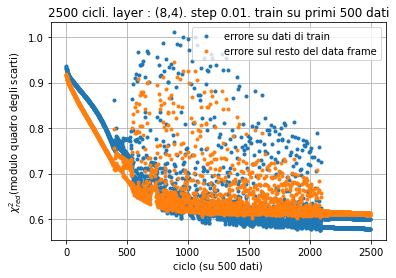

In [18]:
plt.plot(err, '.', label = "errore su dati di train")
plt.plot(ver, '.', label = "errore sul resto del data frame")
plt.xlabel("ciclo (su 500 dati)")
plt.ylabel("$\chi ^2_{red}$(modulo quadro degli scarti)")
plt.title("2500 cicli. layer : (8,4). step 0.01. train su primi 500 dati")
plt.legend()
plt.grid()
plt.show()

Text(0, 0.5, 'errore(modulo quadro degli scarti)')

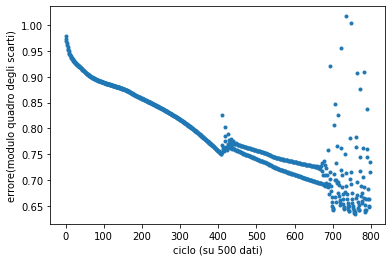

In [138]:
plt.plot(err, '.')
plt.xlabel("ciclo (su 500 dati)")
plt.ylabel("errore(modulo quadro degli scarti)")

In [19]:
ver[-2]

0.6100466256306092

Text(0, 0.5, 'errore(modulo quadro degli scarti)')

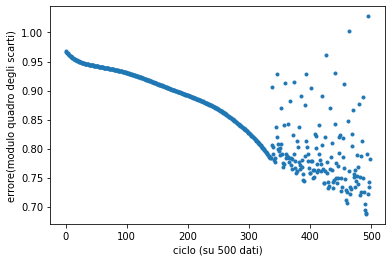

In [11]:
import matplotlib.pyplot as plt

plt.plot(err, '.')
plt.xlabel("ciclo (su 500 dati)")
plt.ylabel("errore(modulo quadro degli scarti)")

In [68]:
o = []
for i in range(-4, 5, 1):
    o = o + [i]
a = Node(o, [1]*10)
a.prop_data()
a.head(-1)
print(a.data)
a.step()
print(a.val_diff)

a.connect_val = a.connect_val + a.val_diff
print(a.connect_val)
a.prop_data()

b = []
for i in range(1, 4):
        b = b +[Node(o, [i*0.2]*10)]
c = Node(b, [1]*5)
b[3].connect_val
c.head(1)
mess = "I dati sul layer b sono:"
for i in b:
    mess = mess + "  " + str(i.data)
print(mess)
c.head(1)
c.step()
mess = "diff sul layer b sono:"
for i in b:
    mess = mess + "  " + str(i.diff)
print(mess)
for i in b:
    i.step()
mess = "diff sul layer b sono:"
for i in b:
    mess = mess + "  " + str(i.diff)
print(mess)
print( b[2].val_diff)
c.implement_val_diff(1,1)
c.head(-1)
c.step()
mess = "dopo un ciclo diff sul layer b sono:"
for i in b:
    mess = mess + "  " + str(i.diff)
print(mess)
mess = "I dati sul layer b sono:"
for i in b:
    mess = mess + "  " + str(i.data)
print(mess)

0.7615941559557649
[ 2.95929738  2.21947304  1.47964869  0.73982435  0.         -0.73982435
 -1.47964869 -2.21947304 -2.95929738 -0.73982435]
[ 3.95929738  3.21947304  2.47964869  1.73982435  1.          0.26017565
 -0.47964869 -1.21947304 -1.95929738  0.26017565]
I dati sul layer b sono:  -0.1973753202249038  0.0  0.1973753202249038  0.3799489622552245  0.5370495669980344
diff sul layer b sono:  0.14608418005874974  0.14608418005874974  0.14608418005874974  0.14608418005874974  0.14608418005874974
diff sul layer b sono:  0.14039317616782016  0.14608418005874974  0.14039317616782016  0.12499529049113287  0.10395025399559427
[-0.5615727  -0.42117953 -0.28078635 -0.14039318  0.          0.14039318
  0.28078635  0.42117953  0.5615727   0.14039318]
dopo un ciclo diff sul layer b sono:  -0.0002159814358603878  -0.00022239380811576033  -0.00022880618037113284  -0.00023473767249174613  -0.00023984159104654395
I dati sul layer b sono:  0.9999998913159042  0.9999999636154937  0.9999999511650863

In [22]:
class Network:
    def __init__(self, layer, data, check, step = 0.1):
        network = [[]]
        
        s = layer.pop(0)
        for i in range(s):
            network[0] = network[0] +[Node(data[0])]
        #network[0] =  np.zeros(len(data[0]))
        
        for i in layer:
            l=[] 
            for j in range(i):
                l = l + [Node(network[-1])]
                #print(j)
            #l = l + [1]
            network = network + [l]
        
    #for i in network[-1]:
        #print(i.data)
        self.check = check
        self.data = data
        self.network = network
        self.step = step
        
        self.ncol = data.shape[1]
        
        self.head = Node(network[-1])
         
      
   
    def set_data(self, row):
        for i in self.network[0]:
            #print (i.data)
            i.connect_down = self.data[row]
            
    def print_layer(self, row):
        for i in self.network[row]:
            print (i.data)
            
    
    def prop_diff_layer(self, layer):
        for i in self.network[layer]:
            i.step()
            
    def full_step(self, row):
        self.set_data(row)
        #self.head.prop_data()
        self.head.head(self.check[row])
        self.head.step()
        for i in range(len(self.network) - 1, -1, -1):
            self.prop_diff_layer(i)
            
    def cycle(self, initial, final):
        out = []
        for i in range(initial, final +1):
            self.full_step(i)
            out = out + [ self.check[i] - self.head.data]
        return out
    
    def verify(self, initial, final):
        out = []
        for i in range(initial, final +1):
            self.set_data(i)
            out = out + [ self.check[i] - self.head.prop_data()]
        return out
    
    def predict(self, initial, final):
        out = []
        for i in range(initial, final +1):
            self.set_data(i)
            out = out + [ np.sign(self.check[i] * self.head.prop_data())]
        return out
            
print("fatto")

fatto


-1

In [82]:
data = pandas.read_csv('train.csv')
df = prepare_data(data)
y = df.pop('Survived').replace(0, -1)
#df = df.to_numpy()



rete = Network([7], df, y)
#rete.head.diff
#rete.full_step(2, 10, 0.001)
#len(df.iloc[3])
#rete.set_data(0)

rete.set_data(2)

print(rete.head.prop_data())
print(rete.head.connect_val)
rete.print_layer(0)
rete.head.head(rete.check[2])

rete.full_step(4, 1)

print(rete.head.diff)
#rete.head.step(1,1)
print(rete.network[0][1].diff)
#rete.prop_diff_layer(0, 1)
rete.step = 1
out_1 = np.array(rete.cycle(0,400))
for i in range(10):
    rete.head.implement_val_diff()
    rete.cycle(0,400)
out_2 = np.array(rete.cycle(0,400))

0.2820551762558901
[ 0.02858903  0.02486153 -0.0200991   0.03929132 -0.04298891 -0.06660124
  0.0929412   0.09489667]
0.9371630497871869
0.9356863869044184
-0.11473888632035083
0.8641968246181437
0.8173485170016127
-0.7910393469930423
0.9807574468290379
-1.1822466328580348
-0.0006196342963407236


In [83]:
print(rete.check[0:8])
print(np.mean(out_1*out_1))
print(np.mean(out_2*out_2))

0   -1
1    1
2    1
3    1
4   -1
5   -1
6   -1
7   -1
Name: Survived, dtype: int64
1.1584556695737946
1.1833892657902605


In [26]:
a = [1, 6, 9, 0, 1]
b = Node(a)
b.connect_down

d=[8, 6, -2, 11, -30]
for j, val in enumerate(d):
    a[j]= val
#b.connect_down = a
b.connect_down

[8, 6, -2, 11, -30]

In [46]:
d= [1, 1.5, -1.3, 0.4]
c = [Node(d, [0.1, 0.2, 0.3, -0.25])]+[Node(d, [0.3, -0.2, 0.01, -0.7])] +[1]
b = Node(c, [0.1,0.4, -0.3])

In [58]:
c[0].diff = 1
c[0].prop_data()
c[0].step(1,1)

In [62]:
print(c[0].diff)
c[0].val_diff

0.5660820787982983


array([ 0.56608208,  0.84912312, -0.7359067 ,  0.22643283,  0.56608208])

In [83]:
a = [3]
a.pop(0)
for i in a:
    print("ciao")

In [262]:
b.head()
b.prop_diff_val()

[0.08404807157135163, 0.33619228628540654, -0.25214421471405485]

In [48]:

data.loc[pandas.isna(data['Age'])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,is_Age
